<a href="https://colab.research.google.com/github/uddeshya-23/Clustering-Data-analysis/blob/main/K_Means_%26%2C_Hierachial_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ONLINE RETAIL DATA SET ANALYSIS

[Online retail dataset](https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci)



*   Read The Data
*   Visualize Data
*   Prepare Data for Modelling
*   Modelling
*   Final Analysis and Recommendation




In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

from scipy.cluster.hierarchy import linkage

from scipy.cluster.hierarchy import dendrogram

from scipy.cluster.hierarchy import cut_tree


In [2]:
##READ THE DATASET
retail=pd.read_csv('/content/drive/MyDrive/Upgrad Data/Online+Retail.csv', sep=',',encoding='ISO-8859-1', header=0)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
##SHAPE OF DATASET
retail.shape

(541909, 8)

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# **CLEANING THE DATA**







In [5]:
## Missing Value
round(100*(retail.isnull().sum()) / len(retail), 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [6]:
## Drop Missing Columns
retail=retail.dropna()

In [7]:
retail.shape

(406829, 8)

# **Prepare data for modelling**

- (R) Recency : Number of days since last purchase

- (F) Frequency : Number of transaction

- (M) Monetary : Total amount of transaction (revenue contributed)

In [8]:
## Start with Monetary the easy one  so for that we need column amount contributed by each customer

retail['amount']=retail['Quantity']*retail['UnitPrice']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [9]:
##Monetary
grouped_retail=retail.groupby('CustomerID')['amount'].sum()
grouped_retail=grouped_retail.reset_index()
grouped_retail.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [10]:
##Frequency
frequency=retail.groupby('CustomerID')['InvoiceNo'].count()
frequency=frequency.reset_index()
frequency.columns=['CustomerID', 'frequency']
frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [11]:
##MERGE BOTH "grouped_retail" &, "frequency" on "CUSTOMERID"
grouped_retail=pd.merge(grouped_retail, frequency, on='CustomerID', how='inner')
grouped_retail.head()

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [12]:
##RECENCY
##FOR this we need to convert invoicedate into datetime object of pandas to do the arithmetic operation on datetime to get the recency

retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'], format='%d-%m-%Y %H:%M')
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [13]:
##Compute the max date
max_date=max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [14]:
## Compute the Difference
retail['period']=max_date-retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,period
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [15]:
last_purchase=retail.groupby('CustomerID')['period'].min()
last_purchase=last_purchase.reset_index()
last_purchase.head()

,CustomerID,period
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [16]:
##MERGE BOTH "grouped_retail" , "frequency" &, "last_purchase" on "CUSTOMERID"
grouped_retail=pd.merge(grouped_retail, last_purchase, on='CustomerID', how='inner')
grouped_retail.columns=['CustomerID', 'amount', 'frequency', 'period']
grouped_retail.head()

,CustomerID,amount,frequency,period
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [17]:
## Extract Number of days only from period column
import datetime as dt
grouped_retail['period']=grouped_retail['period'].dt.days

In [18]:
grouped_retail.head()

,CustomerID,amount,frequency,period
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [19]:
## Outlier Treatment

## Scaling of data beacause in clustering we will calculate distance of two data points for each feature . for "amount" numbers will be very higher as compared to "period"  & "frequency"



{'whiskers': [<matplotlib.lines.Line2D at 0x7afe3282fe50>,
 'caps': [<matplotlib.lines.Line2D at 0x7afe3283c3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7afe3282fbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7afe3283c910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7afe3283cbb0>],
 'means': []}

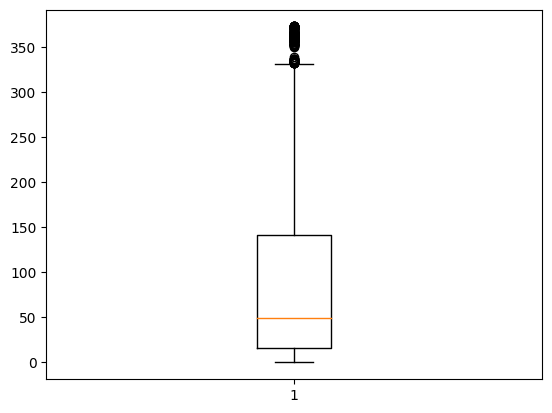

In [20]:
plt.boxplot(grouped_retail['period'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7afe32888c40>,
 'caps': [<matplotlib.lines.Line2D at 0x7afe32889060>,
 'boxes': [<matplotlib.lines.Line2D at 0x7afe328889a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7afe328895a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7afe32889840>],
 'means': []}

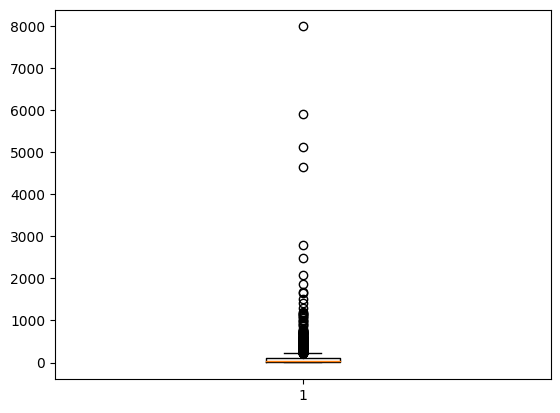

In [21]:
plt.boxplot(grouped_retail['frequency'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7afe328fda80>,
 'caps': [<matplotlib.lines.Line2D at 0x7afe328fdff0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7afe328fd7e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7afe328fe530>],
 'fliers': [<matplotlib.lines.Line2D at 0x7afe328fe7d0>],
 'means': []}

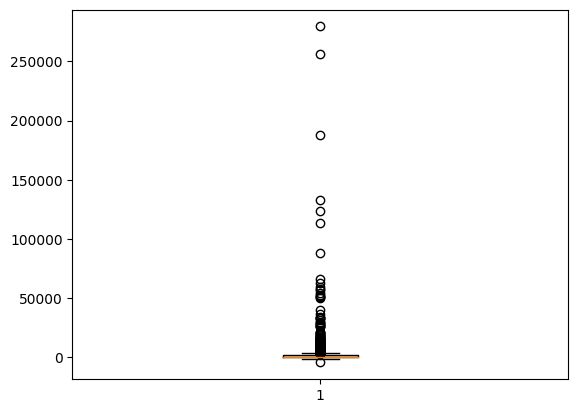

In [22]:
plt.boxplot(grouped_retail['amount'])

In [23]:
## Two type of Outlier
## 1. Domain specific

## 2. Statstical

In [24]:
##Removing Statstical Outliers in frequency, recency &, amount

# col=['frequency','period','amount']

# for i in col:
#     print(i)
#     Q1=grouped_retail[i].quantile(0.5)
#     Q2=grouped_retail[i].quantile(0.95)
#     IQR=Q2-Q1
#     grouped_retail=grouped_retail[i][(grouped_retail[i]>=Q1 - 1.5*IQR) & (grouped_retail[i] <= Q2 + 1.5*IQR)]
#     print(i)

col=['frequency', 'period', 'amount']

for i in col:
    print(i)
    Q1 = grouped_retail[i].quantile(0.5)  # Use quantile(0.25) for Q1, not quantile(0.5)
    Q3 = grouped_retail[i].quantile(0.95)  # Use quantile(0.75) for Q3, not quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    grouped_retail = grouped_retail[(grouped_retail[i] >= lower_bound) & (grouped_retail[i] <= upper_bound)]
    print(i)


frequency
frequency
period
period
amount
amount


In [25]:
## Rescaling

rfm=grouped_retail[['amount','frequency','period']]

##instantiate
scaler=StandardScaler()

##fit transform
rfm_scaled=scaler.fit_transform(rfm)
rfm_scaled.shape

(4280, 3)

In [26]:
## Hopkins

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [27]:
#First convert the numpy array that you have to a dataframe
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.columns = ['amount', 'frequency', 'period']

In [28]:
hopkins(rfm_scaled)

0.9531176164352559

In [29]:
rfm_scaled.head()

,amount,frequency,period
0,-0.754208,-0.758814,2.298087
1,1.877245,1.073866,-0.908672
2,0.343089,-0.463549,-0.186161
3,0.318857,-0.035923,-0.740416
4,-0.550042,-0.606090,2.139729


# Modelling

In [30]:
##K-Means clustering
kmeans=KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_scaled)

KMeans(max_iter=50, n_clusters=4)

In [31]:
kmeans.labels_

array([1, 0, 3, ..., 1, 3, 3], dtype=int32)

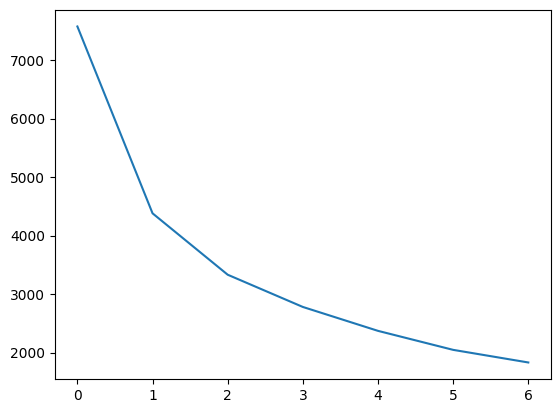

In [32]:
####### Find the SSD , Optimal elbow-curve // SSD
ssd=[]
range_cluster=[2,3,4,5,6,7,8]

for num in range_cluster:
  kmeans=KMeans(n_clusters=num, max_iter=50)
  kmeans.fit(rfm_scaled)
  ssd.append(kmeans.inertia_)

## plot the SSD's for each cluster
plt.plot(ssd)


In [33]:
##[ 2 , 3 ,4 , 5, 6 , 7 , 8]

# **Silhouette analysis**
 can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

In [34]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_cluster=[2,3,4,5,6,7,8]

for num in range_cluster:
  kmeans=KMeans(n_clusters=num, max_iter=50)
  kmeans.fit(rfm_scaled)
  cluster_labels=kmeans.labels_

  # Silhouette score
  silhouette_avg=silhouette_score(rfm_scaled, cluster_labels)
  print("For n_clusters {0}, the silhouette score is {1}".format(num, silhouette_avg))



For n_clusters 2, the silhouette score is 0.5339259544515953
For n_clusters 3, the silhouette score is 0.5043224964421936
For n_clusters 4, the silhouette score is 0.47744355175897746
For n_clusters 5, the silhouette score is 0.4681802969145282
For n_clusters 6, the silhouette score is 0.41693695330039776
For n_clusters 7, the silhouette score is 0.4110681814086727
For n_clusters 8, the silhouette score is 0.4039098324671764


In [35]:
##K-Means clustering
kmeans=KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_scaled)

KMeans(max_iter=50, n_clusters=3)

In [36]:
kmeans.labels_

array([1, 2, 0, ..., 1, 0, 0], dtype=int32)

In [37]:
## Assign the cluster  Label
grouped_retail['ClusterID']=kmeans.labels_
grouped_retail.head()

,CustomerID,amount,frequency,period,ClusterID
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


<Axes: xlabel='ClusterID', ylabel='period'>

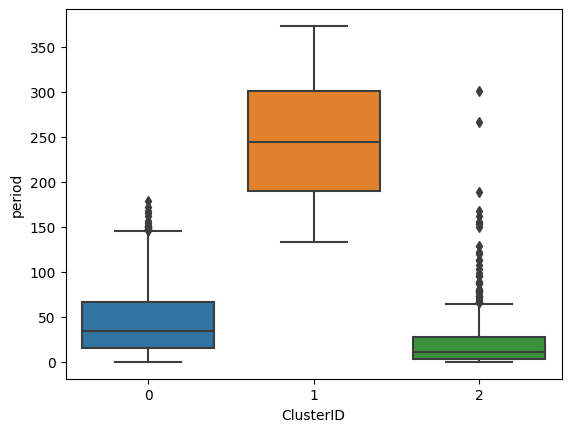

In [38]:
##Plot Recency, frequency &, amount

sns.boxplot(x='ClusterID', y='period', data=grouped_retail )

<Axes: xlabel='ClusterID', ylabel='frequency'>

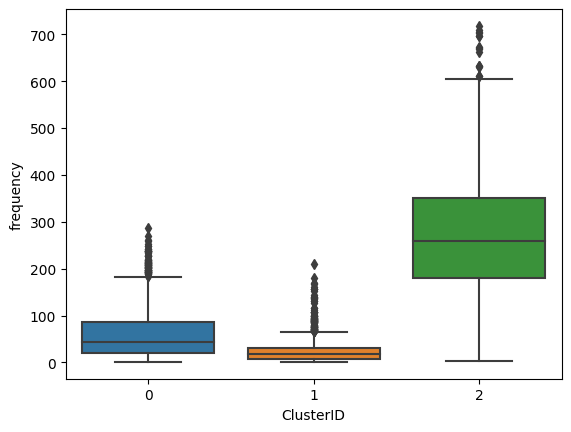

In [39]:
##Plot Recency, frequency &, amount

sns.boxplot(x='ClusterID', y='frequency', data=grouped_retail )

<Axes: xlabel='ClusterID', ylabel='amount'>

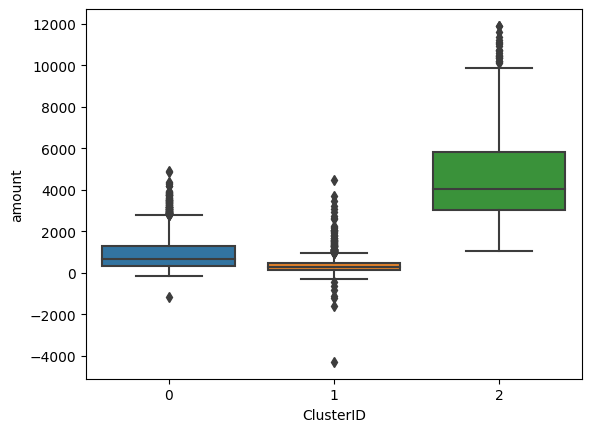

In [40]:
##Plot Recency, frequency &, amount

sns.boxplot(x='ClusterID', y='amount', data=grouped_retail )

#### HIERARCHAL CLUSTERING ####

In [46]:
rfm_scaled.head(5)

,amount,frequency,period
0,-0.754208,-0.758814,2.298087
1,1.877245,1.073866,-0.908672
2,0.343089,-0.463549,-0.186161
3,0.318857,-0.035923,-0.740416
4,-0.550042,-0.606090,2.139729


In [47]:
grouped_retail

,CustomerID,amount,frequency,period,ClusterID
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1
...,...,...,...,...,...
4366,18278.0,173.90,9,73,0
4367,18280.0,180.60,10,277,1
4368,18281.0,80.82,7,180,1
4369,18282.0,176.60,13,7,0


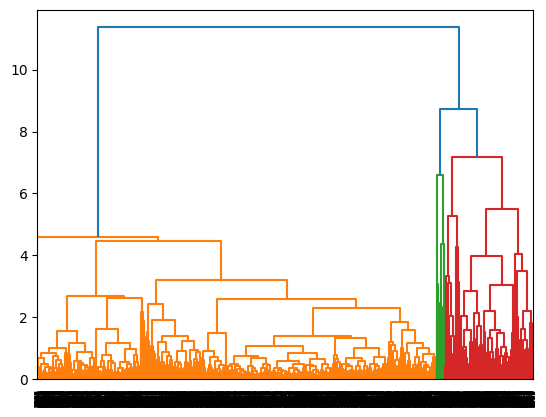

In [52]:
# from seaborn.matrix import dendrogram
## Complete linkage

merging=linkage(rfm_scaled, method="complete", metric='euclidean')
dendrogram(merging)
plt.show()

In [56]:
## 3 clusters

cluster_labels=cut_tree(merging, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [60]:
## Assign cluster labels

grouped_retail.head()
grouped_retail.shape
grouped_retail['cluster_labels']=cluster_labels
grouped_retail.head()

,CustomerID,amount,frequency,period,ClusterID,cluster_labels
0,12346.0,0.00,2,325,1,0
1,12347.0,4310.00,182,1,2,1
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,1
4,12350.0,334.40,17,309,1,0


<Axes: xlabel='cluster_labels', ylabel='amount'>

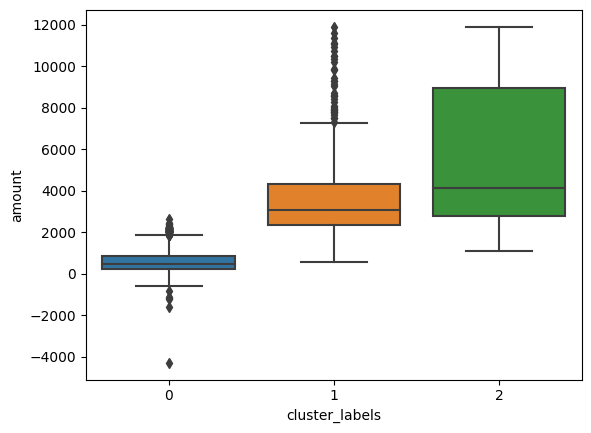

In [62]:
## Plot

sns.boxplot(x='cluster_labels', y='amount', data=grouped_retail)

<Axes: xlabel='cluster_labels', ylabel='frequency'>

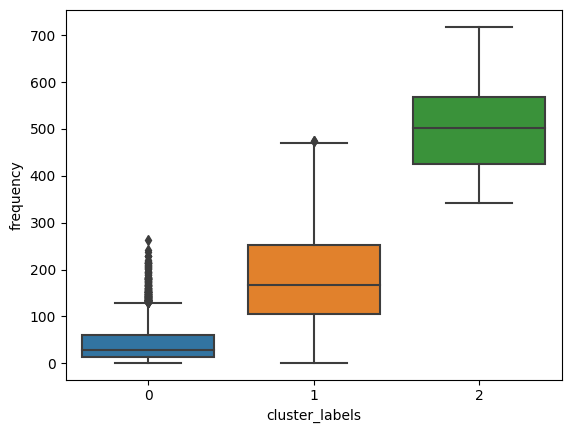

In [63]:

sns.boxplot(x='cluster_labels', y='frequency', data=grouped_retail)

<Axes: xlabel='cluster_labels', ylabel='period'>

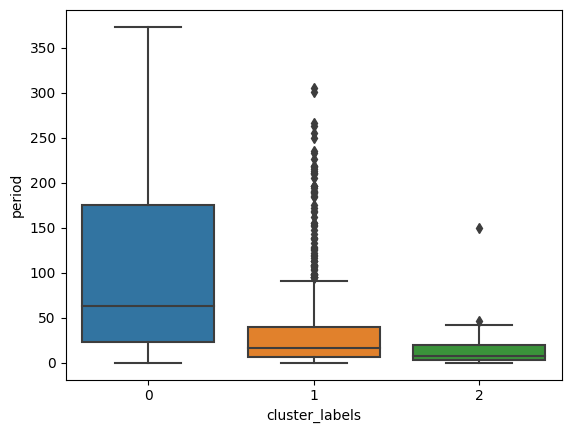

In [65]:

sns.boxplot(x='cluster_labels', y='period', data=grouped_retail)